# Hydrogen Atom Radial Wavefunctions
## Ordinary differential eigenvalue problem


Eigenvalue problems are boundary value problems that only have solutions for particular values of a parameter.  In quantum mechanics these parameters are the quantized variables- like the energy or angular momentum.  

The hydrogen atom is a standard problem in quantum mechanics. You
basically solve the Schroedinger equation for a 1/r central potential.
We won't go through the separation of variables, but you can separate
variables and end up with a differential equation 
$$
\left(\frac{d^{2}}{dr^{2}}+\frac{2}{r}\frac{d}{dr}\right)R(r)+\frac{2\mu}{\hbar^{2}}\left(E+\frac{Ze^{2}}{r}-\frac{l(l+1)\hbar^{2}}{2\mu r^{2}}\right)R(r)=0
$$
where $R$ is the radial wavefunction, $r$ the radius, $\mu$ the reduced
mass, $Ze$ the charge of the nucleus, $e$ the charge of the electron
and $l$ the angular momentum quantum number.

The first step is to define a new independent variable $\rho$ and
a constant $\lambda$ :
$$
\begin{array}{cc}
\rho=\sqrt{\frac{-8\mu E}{\hbar^{2}}}r & \lambda=\frac{Ze^{2}}{\hbar}\sqrt{\frac{-\mu}{2E}}\end{array};
$$ 

so the equation becomes:

$$
\frac{d^{2}R}{d\rho^{2}}+\frac{2}{\rho}\frac{dR}{d\rho}-\frac{l(l+1)}{\rho^{2}}R+\left(\frac{\lambda}{\rho}-\frac{1}{4}\right)R=0
$$

We can find and plot the wave function using odeint, if we knew $\lambda$ and
$dR/d\rho$ at some point. This is an *eigenvalue* problem-
there only exist (finite) solutions for particular values of $\lambda$.
As you probably learned in quantum mechanics, the eigenvalues are
$\lambda=1,2,3,$... 




1. First consider $\lambda=1, l=0.$ The boundary conditions that you want
are that $R=0$ at infinity, and R is finite everywhere. These boundary
conditions are a little tricky to apply numerically- what will end
up happening is that R will diverge due to numerical instabilities
at some point. Start by picking a very large $\rho-$say about 20
and putting in an arbitrary value for R, and $dR/d\rho\sim-R/2$ and
integrating in towards 0. Explore what happens to the solution if
you make $\lambda$ slightly bigger or smaller than one. For each value
of $\lambda$ explore what happens as you vary $dR/d\rho$. You probably
want to use a logarithmic scale for $\rho-$ say going from 20 to 1e-9.
You should be able to find a set of initial conditions/eigenvalues
where the wave function stays relatively constant down to $\rho\sim$ 1e-8.
Look up the wave functions and overlay the analytical result. (Note
that we are free to scale the amplitude of R by a constant, 
so we can always normalize the wave function later. For now, don't
worry about any overall scale factor. )

Convert equations to SI units:

(Table following converstion table is based on the one found in the following link: https://www.plasmaphysics.org.uk/convers.htm; retrieved on Nov. 11th, 2019.)

|                 | cgs   | Conversion factor         | SI      |
| ---             | ---   | ---                       | ---     |
| distance        | cm    | = $10^{-2}$               | m       |
| mass            | g     | = $10^{-3}$               | kg      |
| time            | sec   | =                         | sec     |
| energy          | erg   | = $10^{-7}$               | Joules  |
| electric charge | esu   | = $3.336 \times 10^{-10}$ | Coulomb |

| Variable/constant | cgs factor | SI factor|
| ---               | ---        | ---      |
| $\mu$             | 1          | $10^{-3}$|
| $E$               | 1          | $10^{-7}$|
| $\hbar$           | 1          | $10^{-7}$|
| $r$               | 1          | $10^{-2}$|
| $e$               | 1          | $3.336 \times 10^{-10}$ |


So, $\rho$ and $\lambda$ become, in SI units:
$$
\begin{array}{cc}
\rho_{SI}=\sqrt{\frac{-8(\mu \times 10^{-3}) (E \times 10^{-7})}{(\hbar \times 10^{-7})^{2}}}(r \times 10^{-2}) = \rho_{cgs} \\  \& \; \; \lambda_{SI}=\frac{Z(e \times 3.336 \times 10^{-10})^{2}}{(\hbar \times 10^{-7})}\sqrt{\frac{-(\mu \times 10^{-3})}{2(E \times 10^{-7})}} = \lambda_{cgs} \times 1.113 \times 10^{-10} \end{array};
$$ 

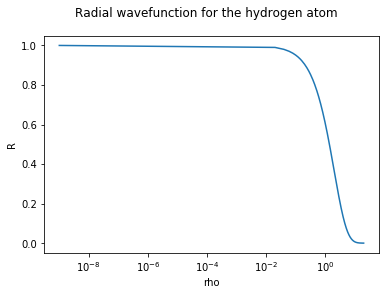

In [278]:
# (i) Start: try 1e-9 < rho < 20 & dR/drho = - R / 2
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Set values for variables.
R = 1
rho = np.linspace(1e-9, 20, 1000)
lamb = 1 * 1.113e-10
l = 0

# Set up differential equation.
def ODE(R, rho):
    dRdrho = - R / 2
    d2Rdrho2 = - (2 / rho) * (dRdrho) + (l * (l + 1) / rho**2) * R - (lamb / rho - 1 / 4) * R
    return (dRdrho)

# Solve the differential equation.
sol = odeint(ODE, R, rho)

# Make plot.
plt.semilogx(rho, sol)
plt.suptitle('Radial wavefunction for the hydrogen atom')
plt.xlabel('rho')
plt.ylabel('R')

plt.show()

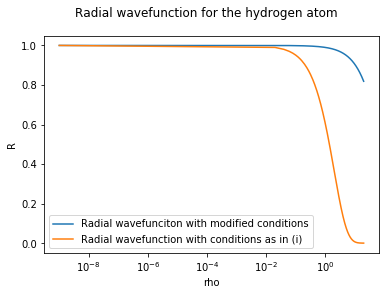

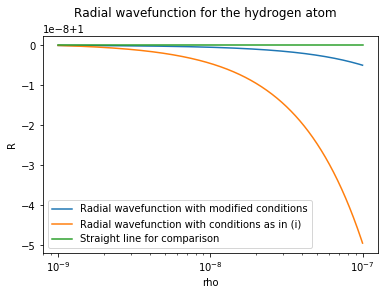

In [279]:
# (ii) Explore what happens to the solution when you make lambda slightly bigger or smaller than 1; also, explore what happens
# to the solution as you vary dR/drho for each lambda.

# Set values for variables.
R = 1
rho = np.linspace(1e-9, 20, 1000)
lamb = 1.2 * 1.113e-10           # Vary lambda around 1 (in cgs).
l = 0

# Set up differential equation.
def ODE(R, rho):
    dRdrho = - R / 100           # Vary 1st-order differential equation.           
    d2Rdrho2 = - (2 / rho) * (dRdrho) + (l * (l + 1) / rho**2) * R - (lamb / rho - 1 / 4) * R
    return (dRdrho)

# Solve the differential equation.
sol = odeint(ODE, R, rho)

# Make plot.
plt.semilogx(rho, sol)

#----------------------------------------------------------------------------
# For comparison: radial wavefunction with the conditions imposed on part (i).

# Set values for variables.
R = 1
rho = np.linspace(1e-9, 20, 1000)
lamb = 1 * 1.113e-10             
l = 0

# Set up differential equation.
def ODE(R, rho):
    dRdrho = - R / 2
    d2Rdrho2 = - (2 / rho) * (dRdrho) + (l * (l + 1) / rho**2) * R - (lamb / rho - 1 / 4) * R
    return (dRdrho)

# Solve the differential equation.
sol = odeint(ODE, R, rho)

# Make plot.
plt.semilogx(rho, sol)

#-
# Annotate the general plot.
plt.suptitle('Radial wavefunction for the hydrogen atom')
plt.xlabel('rho')
plt.ylabel('R')

labels = ['Radial wavefunciton with modified conditions', 'Radial wavefunction with conditions as in (i)']
plt.legend(labels)
plt.show()

################################################################################################################################
# (iii) Find initial conditions/eigenvalues for which the wavefunction stays relatively constant down to rho ~ 1e-8.

# Set values for variables.
R = 1
rho = np.linspace(1e-9, 1e-7, 1000) # This horizontal axis range gives a better idea of when the function is more or less
                                    # constant up to 1e-8.
lamb = 1 * 1.113e-10
l = 0

# Set up differential equation.
def ODE(R, rho):
    dRdrho = - R / 20               # This 1st-order differential equation gives nice results.
    d2Rdrho2 = - (2 / rho) * (dRdrho) + (l * (l + 1) / rho**2) * R - (lamb / rho - 1 / 4) * R
    return (dRdrho)

# Solve the differential equation.
sol = odeint(ODE, R, rho)

# Make plot.
plt.semilogx(rho, sol)

#----------------------------------------------------------------------------
# For comparison: radial wavefunction with the conditions imposed on part (i).

# Set values for variables.
R = 1
rho = np.linspace(1e-9, 1e-7, 1000)
lamb = 1 * 1.113e-10
l = 5

# Set up differential equation.
def ODE(R, rho):
    dRdrho = - R / 2
    d2Rdrho2 = - (2 / rho) * (dRdrho) + (l * (l + 1) / rho**2) * R - (lamb / rho - 1 / 4) * R
    return (dRdrho)

# Solve the differential equation.
sol = odeint(ODE, R, rho)

# Make plot.
plt.semilogx(rho, sol)

#---------------------------------------------------------------------------
# Plot a straight line for comparison.

# General horizontal and vertical values.
x = np.linspace(1e-9, 1e-7, 1000)
y = np.linspace(1, 1, 1000)

# Make plot.
plt.semilogx(x, y)

#-
# Annotate general plot.
plt.suptitle('Radial wavefunction for the hydrogen atom')
plt.xlabel('rho')
plt.ylabel('R')

labels = ['Radial wavefunction with modified conditions', 'Radial wavefunction with conditions as in (i)', 'Straight line for comparison']
plt.legend(labels)

plt.show()

(ii) Comments:

The variation of lambda around 1 (no less than 0.5 and no more than 1.5) does not affect the radial wavefunction significantly for $dR/d\rho = - R/2$. The change in behaviour of the radial wavefunction is more significant for variations on the condition $dR/d\rho$. Compared to $dR/d\rho = - R/2$, for a smaller $dR/d\rho$, the radial wavefunction starts to bend downwards at a larger $\rho$ value than for a larger $dR/d\rho$.

(iv) Use best conditions in found in part (iii) and plot the numerical solution against the analytical solution for the radial wavefunction.

The analytical solution to for the radial wavefunction $R_{\lambda l}(r)$ (in SI units) for $\lambda = 1$ and $l = 0$ is (from Griffiths' Introduction to quantum mechanics, 2nd ed., pp. 150-1):

$$
\begin{equation}
R_{10}(r) = \frac{2}{{a_0}^{3/2}} e^{-r/a_0}
\end{equation},
$$

where $a_0 = \frac{4 \pi \epsilon_0 {\hbar}^2}{m e^2} = 0.529 \times 10^{-10}$ m is the Bohr radius.

Expressed in terms of $\rho$:

$$
\begin{equation}
R_{10}(\rho) = \frac{2}{{a_0}^{3/2}} e^{-[{(\frac{-8\mu E}{\hbar^{2}})}^{-1/2}\rho]/a_0}
\end{equation},
$$

where $E = E_1 = -13.6$ eV $ = -13.6 \times 1.60218 \times 10^{-19}$, $mu = \frac{m_e m_p}{m_e + m_p} = \frac{9.10938 \times 10^{-31} \times 1.67262 \times 10^{-27}}{9.10938 \times 10^{-31} + 1.67262 \times 10^{-27}}$ kg $ = 9.10442 \times 10^{-31}$ kg, $\hbar = 1.05457 \times 10^{-34}$ J $\cdot$ s.

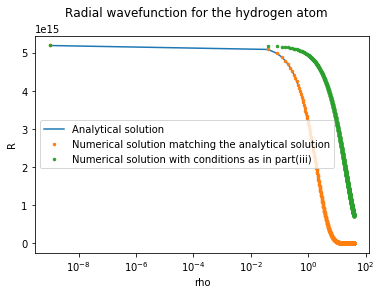

In [280]:
# (iv) Use best conditions in found in part (iii) and plot the numerical solution against the analytical solution for the radial
# wavefunction.

#-------------------------------------------------------------------------------------------
# Analytical solution.

# Set values for variables.
rho = np.linspace(1e-9, 40, 1000)
r = ((8 * 9.10442e-31 * 13.6 * 1.60218e-19)/(1.05457e-34)**2)**(-0.5) * rho
a0 = 0.529e-10

# Analytical radial function.
Ranalytical = (2 / a0**(3/2)) * np.exp(-r/a0)

# Make plot.
plt.plot(rho, Ranalytical)

#-------------------------------------------------------------------------------------------
# Numerical solution.

# Set values for variables.
R = 5.2e15                 # Make the numerical solution's amplitude match the analytical solution's.
lamb = 1 * 1.113e-10
l = 0

# Set up differential equation.
def ODE(R, rho):
    dRdrho = - R / 2       # Adjust accordingly.
    d2Rdrho2 = - (2 / rho) * (dRdrho) + (l * (l + 1) / rho**2) * R - (lamb / rho - 1 / 4) * R
    return (dRdrho)

# Solve the differential equation.
sol = odeint(ODE, R, rho)

# Make plot.
plt.semilogx(rho, sol, '.', markersize = 5)

#-------------------------------------------------------------------------------------------
# Numerical solution with the conditions as in part (iii).

# Set values for variables.
R = 5.2e15                 # Make the numerical solution's amplitude match the analytical solution's.
lamb = 1 * 1.113e-10
l = 0

# Set up differential equation.
def ODE(R, rho):
    dRdrho = - R / 20       # Adjust accordingly.
    d2Rdrho2 = - (2 / rho) * (dRdrho) + (l * (l + 1) / rho**2) * R - (lamb / rho - 1 / 4) * R
    return (dRdrho)

# Solve the differential equation.
sol = odeint(ODE, R, rho)

# Make plot.
plt.semilogx(rho, sol, '.', markersize = 5)

#-
# Annotate general plot.
plt.suptitle('Radial wavefunction for the hydrogen atom')
plt.xlabel('rho')
plt.ylabel('R')

labels = ['Analytical solution', 'Numerical solution matching the analytical solution', 'Numerical solution with conditions as in part(iii)']
plt.legend(labels)

plt.show()

NOTES:

The numerical solution matches the analytical solution with the following conditions:

$R_0 = 5.2 \times 10^{15}$,

$\lambda = 1$,

$l = 0$,

$dR/d\rho = - R / 2$ (this is interesting, given the results obtained in part (iii); for $dR/d\rho = - R / 20$ as determined in part (iii), the numerical solution starts to decay at a larger $\rho$ value than at the one the analytical solution does. It seems that I took it too seriously).

2. Plot similar solutions for other values of $\lambda$ and $l$.

Other analytical radial wavefunctions are (from Griffiths's Introduction to quantum mechanics, 2nd ed., p. 151):

$\lambda = 2 (cgs), l = 0$:

$$
\begin{equation}
R_{20}(r) = \frac{1}{{a_0}^{3/2}}(1 - \frac{r}{2a_0}) e^{-r/2a_0}
\end{equation}.
$$

$\lambda = 2 (cgs), l = 1$:

$$
\begin{equation}
R_{21}(r) = \frac{1}{2{a_0}^{5/2}} r e^{-r/2a_0}
\end{equation}.
$$

For the two cases above, $E = E_2 = E1 / 4$.

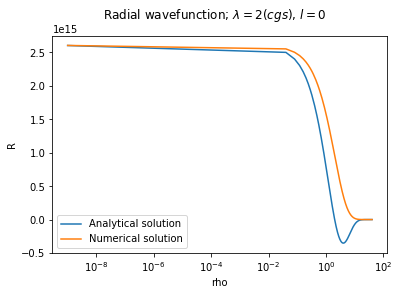

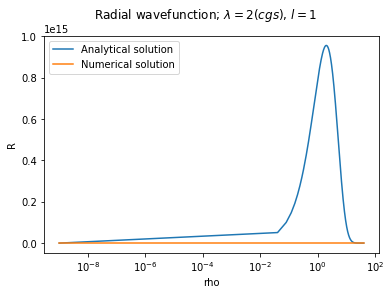

In [281]:
# lambda = 2 (cgs), l = 0.

#--------------------------------------------------------------------------
# Analytical solution.

# Set values for variables.
rho = np.linspace(1e-9, 40, 1000)
r = ((8 * 9.10442e-31 * 13.6 * 1.60218e-19 / 4)/(1.05457e-34)**2)**(-0.5) * rho
a0 = 0.529e-10

# Analytical radial function.
Ranalytical20 = (1 / a0**(3/2)) * (1 - (r / (2 * a0))) * np.exp(-r/(2*a0))

# Make plot.
plt.semilogx(rho, Ranalytical20)

#--------------------------------------------------------------------------
# Numerical solution.

# Set values for variables.
R = 2.6e15                 # Make the numerical solution's amplitude match the analytical solution's.
lamb = 2 * 1.113e-10
l = 0

# Set up differential equation.
def ODE(R, rho):
    dRdrho = - R / 2       # Adjust accordingly.
    d2Rdrho2 = - (2 / rho) * (dRdrho) + (l * (l + 1) / rho**2) * R - (lamb / rho - 1 / 4) * R
    return (dRdrho)

# Solve the differential equation.
sol = odeint(ODE, R, rho)
R20 = sol

# Make plot.
plt.semilogx(rho, R20, '-', markersize = 5)

#-
# Annotate general plot.
plt.suptitle('Radial wavefunction; $\lambda = 2 (cgs)$, $l = 0$')
plt.xlabel('rho')
plt.ylabel('R')

labels = ['Analytical solution', 'Numerical solution']
plt.legend(labels)

plt.show()


#--------------------------------------------------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------------------------------------------------
# lambda = 2 (cgs), l = 1.

#--------------------------------------------------------------------------
# Analytical solution.

# Set values for variables.
rho = np.linspace(1e-9, 40, 1000)
r = ((8 * 9.10442e-31 * 13.6 * 1.60218e-19 / 4)/(1.05457e-34)**2)**(-0.5) * rho
a0 = 0.529e-10

# Analytical radial function.
Ranalytical21 = (1 / (2 * a0**(5/2))) * r * np.exp(-r/(2*a0))

# Make plot.
plt.semilogx(rho, Ranalytical21)

#--------------------------------------------------------------------------
# Numerical solution.

# Set values for variables.
R = 0e15                 # Make the numerical solution's amplitude match the analytical solution's.
lamb = 2 * 1.113e-10
l = 1

# Set up differential equation.
def ODE(R, rho):
    dRdrho = - R / 2       # Adjust accordingly.
    d2Rdrho2 = - (2 / rho) * (dRdrho) + (l * (l + 1) / rho**2) * R - (lamb / rho - 1 / 4) * R
    return (dRdrho)

# Solve the differential equation.
sol = odeint(ODE, R, rho)
R21 = sol

# Make plot.
plt.semilogx(rho, R21, '-', markersize = 5)

#-
# Annotate general plot.
plt.suptitle('Radial wavefunction; $\lambda = 2 (cgs)$, $l = 1$')
plt.xlabel('rho')
plt.ylabel('R')

labels = ['Analytical solution', 'Numerical solution']
plt.legend(labels)

plt.show()


3. The physical potential isn't $1/r$ inside the nucleus. Instead, we
should consider the nucleus as a sphere of uniform charge density-
so the potential is 0 at $r=0$, and is proportional to $r$ until we get
to the outside of the nucleus, at $r=1.2\times 10^{-15}$ m. Change the potential
and compare the new eigenvalues and wavefunctions to the old ones.
For this case there are no analytic solutions.

The provided equations are:

$$
\left(\frac{d^{2}}{dr^{2}}+\frac{2}{r}\frac{d}{dr}\right)R(r)+\frac{2\mu}{\hbar^{2}}\left(E+\frac{Ze^{2}}{r}-\frac{l(l+1)\hbar^{2}}{2\mu r^{2}}\right)R(r)=0
$$


$$
\frac{d^{2}R}{d\rho^{2}}+\frac{2}{\rho}\frac{dR}{d\rho}-\frac{l(l+1)}{\rho^{2}}R+\left(\frac{\lambda}{\rho}-\frac{1}{4}\right)R=0
$$



In SI units, the radial (differential) equation is given by (from Griffiths' Introduction to quantum mechanics, 2nd ed., p.140, with the difference that here I will use the reduced mass):

$$
\begin{equation}
\frac{d}{dr}\left(r^2 \frac{dR(r)}{dr}\right) - \frac{2 \mu r^2}{{\hbar}^2}(V(r) - E)R(r) = l(l + 1)R(r)
\end{equation}.
$$

Re-write it in a more convenient form:

$$
\begin{equation}
\left(\frac{d^2}{dr^2} + \frac{2}{r}\frac{d}{dr}\right)R(r) + \frac{2 \mu}{{\hbar}^2}\left(E - V(r) - \frac{l(l+1){\hbar}^2}{2 \mu r^2}\right)R(r) = 0
\end{equation}.
$$

We consider two limits:

(1) r = 0, V = 0:

$$
\begin{equation}
\left(\frac{d^2}{dr^2} + \frac{2}{r}\frac{d}{dr}\right)R(r) + \frac{2 \mu}{{\hbar}^2}\left(E - \frac{l(l+1){\hbar}^2}{2 \mu r^2}\right)R(r) = 0
\end{equation}
$$

Multiply through by $r^2$:

$$
\begin{equation}
\left(r^2 \frac{d^2}{dr^2} + 2r \frac{d}{dr}\right)R(r) + \frac{2 \mu}{{\hbar}^2}\left(E r^2 - \frac{l(l+1){\hbar}^2}{2 \mu}\right)R(r) = 0
\end{equation},
$$

which simplifies to:

$$
\begin{equation}
\frac{l(l+1){\hbar}^2}{2 \mu}R(r) = 0
\end{equation},
$$

This must be truw for all $l$, which implies that $R(r) = 0$. We define $\rho = 0$.


(2) $0 < r < r_0$, $V(r) = V_0 \frac{r}{r0}$ (educated guess, guided by Problem 2, Assignment 3, of Phys 472 (Quantum mechanics B), attached as a pdf fiel), where $V_0 = - \frac{Ze^2}{r_0}$ (in cgs units), and $r_0 = 1.2 \times 10^{-13}$ cm:

$$ \begin{equation}
\left(\frac{d^2}{dr^2} + \frac{2}{r}\frac{d}{dr}\right)R(r) + \frac{2 \mu}{{\hbar}^2}\left(E - V_0 \frac{r}{r_0} - \frac{l(l+1){\hbar}^2}{2 \mu r^2}\right)R(r) = 0
\end{equation};
$$

the eigenvalues become:

$$
\begin{array}{cc}
\rho=\sqrt{\frac{-8\mu E}{\hbar^{2}}}\frac{1}{r} & \lambda=\frac{Ze^{2}}{\hbar {r_0}^2}\sqrt{\frac{-\mu}{2E}}
\end{array};
$$

Then the differential equation can be simplified to:

$$
-\frac{{\hbar}^2}{8 \mu E} \left({\rho}^4 \frac{d^{2}R}{d\rho^{2}}+2{\rho}^3\frac{dR}{d\rho} - {\rho}^2 l(l+1)R \right)+\left(\frac{\lambda}{\rho}-\frac{1}{4}\right)R=0.
$$

For the following, consider the ground state energy: $E = E_1 = -13.6$ eV $ = -13.6 \times 1.60218 \times 10^{-19}$.

C:\Users\alejandrosalazar\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\alejandrosalazar\Anaconda3\lib\site-packages\matplotlib\ticker.py:2198: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


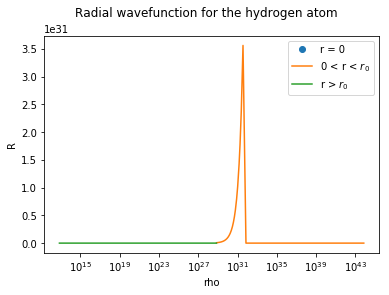

In [325]:
# Limit 1; r = 0, V = 0.

# Set values to variables.
R = 1
rho = 0

# Make plot.
plt.plot(rho, R, 'o')

# Annotate plot.
plt.suptitle('Radial wavefunction for the hydrogen atom')
plt.xlabel('rho')
plt.ylabel('R')

#---------------------------------------------------------------------------------
# Limit 2; 0 < r < r0, V(r) = V0 (r/r0).

# Set values for variables and constants.

r0 = 1e-23 * 1e15        # So the computer has less troubles computing.
hbar = 1.05457e-34       # Planck's constant.
mu = 9.10442e-31         # The reduced mass.
E = -13.6 * 1.60218e-19  # Ground state energy of the Hydrogen atom.
lamb = 1 / r0 * 1.113e-10
l = 0
f1 = - hbar**2 / (8 * mu * E)

R = 1
r = np.linspace(1e-23, r0, 1000)
rho = ((8 * 9.10442e-31 * 13.6 * 1.60218e-19)/(1.05457e-34)**2)*0.5 * (1 / r)

# Set up differential equation.
def ODE(R, rho):
    dRdrho = - 2 / R
    d2Rdrho2 = (1 / (f1 * rho**4)) * (- f1 * 2 * rho**3 * (dRdrho) + f1 * rho**2 * l * (l + 1) * R - (lamb / rho - 1 / 4) * R)
    return (dRdrho)

# Solve the differential equation.
sol = odeint(ODE, R, rho)

# Make plot.
plt.semilogx(rho, sol)

# Annotate plot.
plt.suptitle('Radial wavefunction for the hydrogen atom')
plt.xlabel('rho')
plt.ylabel('R')

#---------------------------------------------------------------------------------
# Limit 3; r > r0, V(r) = Ze^2/r.

# Bring back code from part (i).

# Set values for variables.
R = 1
r = np.linspace(r0, 100000000, 1000000)
rho = ((8 * 9.10442e-31 * 13.6 * 1.60218e-19)/(1.05457e-34)**2)*0.5 * r
lamb = 1 * 1.113e-10
l = 0

# Set up differential equation.
def ODE(R, rho):
    dRdrho = - R / 2
    d2Rdrho2 = - (2 / rho) * (dRdrho) + (l * (l + 1) / rho**2) * R - (lamb / rho - 1 / 4) * R
    return (dRdrho)

# Solve the differential equation.
sol = odeint(ODE, R, rho)

# Make plot.
plt.semilogx(rho, sol)

# Annotate plot.
plt.suptitle('Radial wavefunction for the hydrogen atom')
plt.xlabel('rho')
plt.ylabel('R')

labels = ['r = 0', '0 < r < $r_0$', 'r > $r_0$']
plt.legend(labels)

plt.show()